# One Pixel Attack Tutorial

![](images/horse.png "I'm a normal horse, nothing suspicious here") ![](images/horse-attack.png "I'm an attack horse, grr")

### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.datasets import cifar10
from scipy.optimize import differential_evolution
from scipy.stats import truncnorm

/home/hyper/Documents/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from networks.wide_resnet import WideResNet
from helper import get_class_names

In [3]:
matplotlib.style.use('ggplot')

### Load Data

Load the Cifar10 dataset and any necessary metadata.

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# Obtain the names of the 10 classes in cifar10
class_names = get_class_names()
print(class_names)

Decoding file: data/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Load Models

Load various Neural Network models (train them if they don't exist in the `networks/models` directory).

In [6]:
wide_resnet = WideResNet()

models = [wide_resnet]

Successfully loaded wide_resnet


### Image Perturbation

In [13]:
def perturb_image(x, img):
    img = np.copy(img)
    pixels = np.split(x.astype(int), len(x) // 5)
    for x in pixels:
        x_pos, y_pos, rgb = *x[:2], x[2:]
        img[x_pos][y_pos] = rgb
    return img

In [14]:
def predict_targeted(x, *args):
    img, target_class, model = args
    img_perturbed = perturb_image(x, img)
    prediction = model.predict(img_perturbed)
    return 1 - prediction[0][target_class]

In [15]:
def predict_untargeted(x, *args):
    img, correct_class, model = args
    img_perturbed = perturb_image(x, img)
    prediction = model.predict(img_perturbed)
    return prediction[0][correct_class]

### Attack Types

In [16]:
iterations = 30
population = 400
stop_threshold = -0.01

In [17]:
def attack_untargeted(model, pixel_count=1, sample_count=100):
    print('Targeting model', model.name)
    
    samples = np.random.choice(len(x_test), sample_count)
    
    results = []
    for i,img in enumerate(samples):
        print()
        print('Iteration', i)
        print('Attacking image', img)
        
        plt.grid()
        plt.imshow(x_test[img])
        plt.show()
        
        args = x_test[img], y_test[img], model
        bounds = [(0,32), (0,32), (0,256), (0,256), (0,256)] * pixel_count
        attack = predict_untargeted

        res = differential_evolution(attack, bounds, args=args, maxiter=iterations, popsize=population, mutation=0.5, recombination=0.5, atol=stop_threshold, disp=True)
        
        attack_image = perturb_image(res.x, x_test[img])
        predicted_probs = model.predict(attack_image)
        predicted_class = np.argmax(predicted_probs)
        actual_class = y_test[img]
        
        plt.grid()
        plt.imshow(attack_image)
        plt.show()
        
        print('Prediction:', class_names[predicted_class])
        print('Actual:', class_names[actual_class])
        
        result = img, predicted_class, actual_class, predicted_probs, attack_image
        results.append(result)
        
    return results

Targeting model wide_resnet
Attacking image 5570


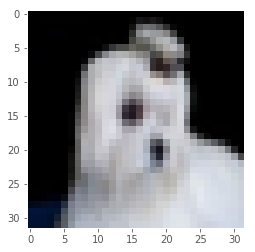

differential_evolution step 1: f(x)= 0.996184
differential_evolution step 2: f(x)= 0.992553
differential_evolution step 3: f(x)= 0.992428
differential_evolution step 4: f(x)= 0.992428
differential_evolution step 5: f(x)= 0.992428
differential_evolution step 6: f(x)= 0.992428
differential_evolution step 7: f(x)= 0.991892
differential_evolution step 8: f(x)= 0.99182
differential_evolution step 9: f(x)= 0.991647
differential_evolution step 10: f(x)= 0.991494
differential_evolution step 11: f(x)= 0.991494
differential_evolution step 12: f(x)= 0.991484
differential_evolution step 13: f(x)= 0.991415
differential_evolution step 14: f(x)= 0.991415
differential_evolution step 15: f(x)= 0.991392
differential_evolution step 16: f(x)= 0.991389
differential_evolution step 17: f(x)= 0.991385
differential_evolution step 18: f(x)= 0.991372
differential_evolution step 19: f(x)= 0.991372
differential_evolution step 20: f(x)= 0.991372
differential_evolution step 21: f(x)= 0.991372
differential_evolution 

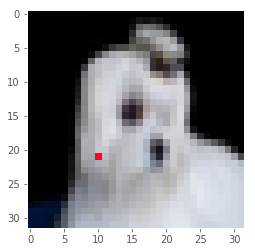

Prediction: dog
Actual: dog
Attacking image 4306


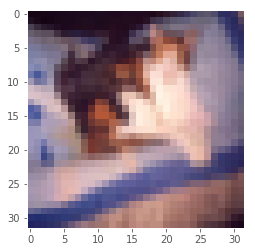

differential_evolution step 1: f(x)= 0.286348
differential_evolution step 2: f(x)= 0.0944981
differential_evolution step 3: f(x)= 0.0930919
differential_evolution step 4: f(x)= 0.0930919
differential_evolution step 5: f(x)= 0.0924994
differential_evolution step 6: f(x)= 0.0924994
differential_evolution step 7: f(x)= 0.0758797
differential_evolution step 8: f(x)= 0.0758797
differential_evolution step 9: f(x)= 0.0737554
differential_evolution step 10: f(x)= 0.0737554
differential_evolution step 11: f(x)= 0.0718309
differential_evolution step 12: f(x)= 0.0695282
differential_evolution step 13: f(x)= 0.0695282
differential_evolution step 14: f(x)= 0.0695282
differential_evolution step 15: f(x)= 0.0695282
differential_evolution step 16: f(x)= 0.0695282
differential_evolution step 17: f(x)= 0.0695282
differential_evolution step 18: f(x)= 0.0695282
differential_evolution step 19: f(x)= 0.0695282
differential_evolution step 20: f(x)= 0.0695282
differential_evolution step 21: f(x)= 0.0695282
di

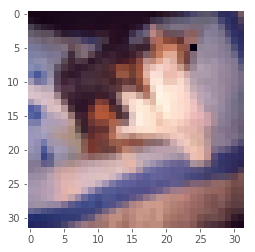

Prediction: frog
Actual: frog
Attacking image 6170


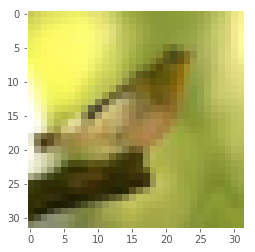

differential_evolution step 1: f(x)= 0.746118
differential_evolution step 2: f(x)= 0.746118
differential_evolution step 3: f(x)= 0.746118
differential_evolution step 4: f(x)= 0.746118
differential_evolution step 5: f(x)= 0.740995
differential_evolution step 6: f(x)= 0.733414
differential_evolution step 7: f(x)= 0.733414
differential_evolution step 8: f(x)= 0.723379
differential_evolution step 9: f(x)= 0.723379
differential_evolution step 10: f(x)= 0.723379
differential_evolution step 11: f(x)= 0.723379
differential_evolution step 12: f(x)= 0.723379
differential_evolution step 13: f(x)= 0.722137
differential_evolution step 14: f(x)= 0.720808
differential_evolution step 15: f(x)= 0.720808
differential_evolution step 16: f(x)= 0.720177
differential_evolution step 17: f(x)= 0.718927
differential_evolution step 18: f(x)= 0.718927
differential_evolution step 19: f(x)= 0.70292
differential_evolution step 20: f(x)= 0.698406
differential_evolution step 21: f(x)= 0.697686
differential_evolution 

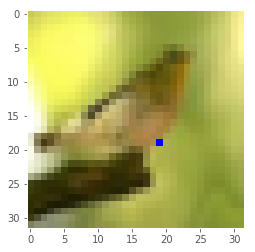

Prediction: bird
Actual: bird
Attacking image 1254


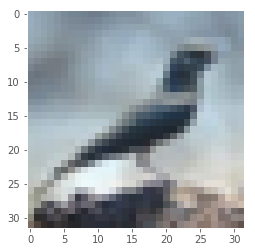

differential_evolution step 1: f(x)= 0.997154
differential_evolution step 2: f(x)= 0.996814
differential_evolution step 3: f(x)= 0.995819
differential_evolution step 4: f(x)= 0.993993
differential_evolution step 5: f(x)= 0.993698
differential_evolution step 6: f(x)= 0.993698
differential_evolution step 7: f(x)= 0.99362
differential_evolution step 8: f(x)= 0.993482
differential_evolution step 9: f(x)= 0.993482
differential_evolution step 10: f(x)= 0.993385
differential_evolution step 11: f(x)= 0.993347
differential_evolution step 12: f(x)= 0.993314
differential_evolution step 13: f(x)= 0.993273
differential_evolution step 14: f(x)= 0.993273
differential_evolution step 15: f(x)= 0.993264
differential_evolution step 16: f(x)= 0.993264
differential_evolution step 17: f(x)= 0.993263
differential_evolution step 18: f(x)= 0.993263
differential_evolution step 19: f(x)= 0.993263
differential_evolution step 20: f(x)= 0.993263
differential_evolution step 21: f(x)= 0.993263
differential_evolution 

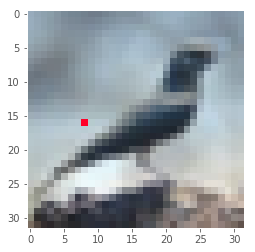

Prediction: bird
Actual: bird
Attacking image 6683


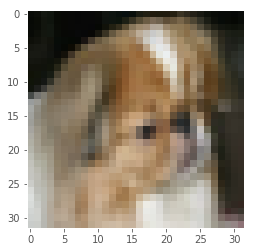

differential_evolution step 1: f(x)= 0.998246
differential_evolution step 2: f(x)= 0.997707
differential_evolution step 3: f(x)= 0.997707
differential_evolution step 4: f(x)= 0.997707
differential_evolution step 5: f(x)= 0.996579
differential_evolution step 6: f(x)= 0.996579
differential_evolution step 7: f(x)= 0.996579
differential_evolution step 8: f(x)= 0.996579
differential_evolution step 9: f(x)= 0.996579
differential_evolution step 10: f(x)= 0.996137
differential_evolution step 11: f(x)= 0.996137
differential_evolution step 12: f(x)= 0.996137
differential_evolution step 13: f(x)= 0.996033
differential_evolution step 14: f(x)= 0.996033
differential_evolution step 15: f(x)= 0.995661
differential_evolution step 16: f(x)= 0.995625
differential_evolution step 17: f(x)= 0.99543
differential_evolution step 18: f(x)= 0.99543
differential_evolution step 19: f(x)= 0.995339
differential_evolution step 20: f(x)= 0.995339
differential_evolution step 21: f(x)= 0.96369
differential_evolution st

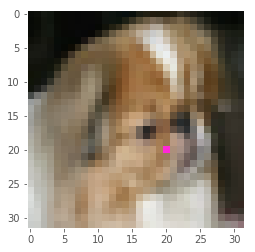

Prediction: dog
Actual: dog
Attacking image 5049


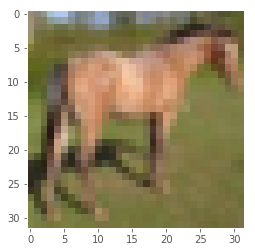

differential_evolution step 1: f(x)= 0.999955
differential_evolution step 2: f(x)= 0.99995
differential_evolution step 3: f(x)= 0.99995
differential_evolution step 4: f(x)= 0.999948
differential_evolution step 5: f(x)= 0.999948
differential_evolution step 6: f(x)= 0.999944
differential_evolution step 7: f(x)= 0.999944
differential_evolution step 8: f(x)= 0.999944
differential_evolution step 9: f(x)= 0.999944
differential_evolution step 10: f(x)= 0.999944
differential_evolution step 11: f(x)= 0.999943
differential_evolution step 12: f(x)= 0.999942
differential_evolution step 13: f(x)= 0.999942
differential_evolution step 14: f(x)= 0.999941
differential_evolution step 15: f(x)= 0.999941
differential_evolution step 16: f(x)= 0.999941
differential_evolution step 17: f(x)= 0.999941
differential_evolution step 18: f(x)= 0.999941
differential_evolution step 19: f(x)= 0.999941
differential_evolution step 20: f(x)= 0.999941
differential_evolution step 21: f(x)= 0.999941
differential_evolution s

In [ ]:
untargeted_results = attack_untargeted(models[0])
untargeted_results

In [65]:
def attack_targeted(model, pixel_count=1, sample_count=100):
    print('Targeting model', model.name)
    samples = np.random.choice(len(x_test), sample_count)
    
    results = []
    for i,img in enumerate(samples):
        print()
        print('Iteration', i)
        for target in range(10):
            if target == y_test[img]:
                continue
            print()
            print('Attacking image', img, 'with target', target, class_names[target])
            
            plt.grid()
            plt.imshow(x_test[img])
            plt.show()
            
            args = x_test[img], target, model
            bounds = [(0,32), (0,32), (0,256), (0,256), (0,256)] * pixel_count
            attack = predict_targeted

            res = differential_evolution(attack, bounds, args=args, maxiter=iterations, popsize=population, mutation=0.5, recombination=0.5, atol=stop_threshold, disp=True)

            attack_image = perturb_image(res.x, x_test[img])
            predicted_probs = model.predict(attack_image)
            predicted_class = np.argmax(predicted_probs)
            actual_class = y_test[img]
            
            plt.grid()
            plt.imshow(attack_image)
            plt.show()

            print('Prediction:', class_names[predicted_class])
            print('Actual:', class_names[actual_class])

            result = img, predicted_class, actual_class, predicted_probs, attack_image
            results.append(result)
        
    return results

Targeting model wide_resnet
Attacking image 6521 with target 0 airplane


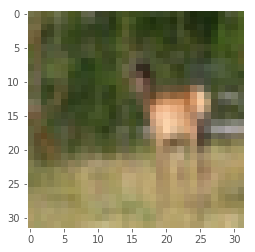

differential_evolution step 1: f(x)= 0.999988
differential_evolution step 2: f(x)= 0.999985
differential_evolution step 3: f(x)= 0.999982
differential_evolution step 4: f(x)= 0.999944
differential_evolution step 5: f(x)= 0.999944
differential_evolution step 6: f(x)= 0.999944


KeyboardInterrupt: 

In [66]:
targeted_results = attack_targeted(models[0])
targeted_results

### Show some successful attacks

Plot the first 9 misclassified images

## Credits
 - Base code taken from https://github.com/09rohanchopra/cifar10
 - https://arxiv.org/pdf/1412.6806.pdf
 - https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
 - https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/06_CIFAR-10.ipynb
 - http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
 - https://parneetk.github.io/blog/cnn-cifar10/
 - https://github.com/dnlcrl/deep-residual-networks-pyfunt/blob/master/docs/CIFAR-10%20Experiments.ipynb